Author: Felix Ng 
Title: Continents VS Climate Change 

Question: How positively is Climate change spoken about in each continent in the world?
If so, what topics around climate change are aurthors moostly talking about? 
And Who are the aurthors trying to target with their articles? 
Finding answers to this question will indicate how well each continent in the world is handling the issue of climate change the best. 
I will be performing a sentiment analaysis on the text from each continent and comparing which one has the greatest compound sentiment. Then I will count the verbs and nouns to tell us what are the most common topics are talked about by each aurthor in each continent. I will find all the most frequent triple collacations from each continent to see what auxillary verbs were used with what verby verbs, this would allow us to see more in depth what each aurthor is talking about to see what actions they are promoting. I will then calculate a percentage of words associated with the words 'Pain' and 'Pleasure' for each continent as a supplement to my sentiment analysis. I'm also going to calculate the percentage of words that are deemed as being learnt over the age of 12 from from each continent which will tell us what types of audience the aurthors were targeting and whether they are trying to influence public opinion or government opinion. Those continents with a higher percentage of words over 12 would indicate that the aurthors were targeting an older audience those that are able to vote would would indirectly influence the government decisions. As for communist countries, this might be a way of us telling if continents with coummunist countries do better than democratic ones. 
This question is interesting to people who are looking to find out if climate change is improving over time and in what areas in the world. The results of this program will tell us the level of compound sentiment for each continent in the world given a newspaper article from each continent as input.


Data: 
I got my data from The main news broadcasters from each continent. Europe: EuroNews, Africa: AfricaNews, 
Asia: ChannelNewsAsia, America: CNN, Oceania: NZHerald. This is so I can make sure the aurthors are writing news thats targeted towards people of that continent. I took the Top 10 most common results from the year 2021 for every one of those news sites, this was so I could make sure I wasn't cherry picking my data. These newsapaper articles will tell us how climate change is affecting that particlar continent. 

My data is 5 seperate .txt files and will be read in to this notebook. Each file is named by its continent that the data is from. Each file will contain the full 10 articles from its news site all put together one after another in just that single txt file. I had manually copied this data from the news articles from each of the sites and pasted them into the file. 

Since we have 5 continents we will have a total of 50 articles since its 10 per continent. I have counted the number of words in each continent txt file. Europe: 9042, Africa: 3776, Asia: 9542, America: 12166, Oceania: 8531. The count is obviously very different from each continent which is why we use percentages of our measurements inorder to eliminate how the differing numbers will affect out results. 

Why news text is a good way to measure this? Climate change is most commonly announced on the news because the news is designed for all users of all ages in both electronic and paper form. So I’m using newspaper articles as that is where most of the traffic for climate change is directed. The limitations to news text types is that one could input clear bad news about climate change or clear good news about it and therefore making the results useless as its already obvious. We could potentially use other kinds of text such as social media posts but these may hold a lot more bias than newspaper articles and so it may give off inaccurate results.


In [6]:
#!pip install nltk
#import nltk

In [7]:
#nltk.download() #opens window for download of nltk packages, should return true in this console when u exit the window and done

In [8]:
#RUN ALL CELLS FOR RESULTS!
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk import FreqDist
import pandas as pd
from nltk.collocations import *
import requests
import matplotlib.pyplot as plt
import numpy as np
sia = SentimentIntensityAnalyzer() 

In [9]:
def load_text(filepath):
    try:
        assert isinstance(filepath, str)
    except ValueError:
        return 'Input is not a String'
    else:
        return open(filepath, encoding="utf8").read().lower()

In [10]:
#Global variables 
Europe = load_text("Europe.txt")
Africa = load_text("Africa.txt")
Asia = load_text("Asia.txt")
America = load_text("America.txt")
Oceania = load_text("Oceania.txt")

In [11]:
continents = ["Europe", "Africa", "Asia", "Americas", "Oceania"]
var = -1
Eur_size = 0
Afr_size = 0
Asi_size = 0
Ame_size = 0
Oce_size = 0
cont_size = [Eur_size, Afr_size, Asi_size, Ame_size, Oce_size]
for cont in (Europe, Africa, Asia, America, Oceania):  
    var = var + 1 
    tokens = nltk.word_tokenize(cont) 
    cont_size[var] = len(tokens)

In [12]:
def climate_verification():
    #list of words associated with climate change (12 words)
    climate_change = ["methane", "carbon dioxide", "renewable energy", "global average temperature", "sea level rise",
                      "fossil fuels", "global warming", "climate change", "weather", "climate", "emissions", "greenhouse gas"]

    #validates the article to being climate related 
    for cont in (Europe, Africa, Asia, America, Oceania):    
        cont = cont.lower()                                   
        count = 0                                             
        for i in cont.split():                                
            if i in climate_change:                           
                count = count + 1                             
        if count < (len(climate_change)/2):                   
            raise Exception("Not climate related article")    
        else:
            return True                                          

In [13]:
def polarity_values():
    values = []
    stop = set(stopwords.words("english"))
    for cont in (Europe, Africa, Asia, America, Oceania): 
        cont = cont.lower()
        average = []
        for c in sent_tokenize(cont): 
            filtered_cont = []
            for i in c.split():
                if i not in stop:
                    filtered_cont.append(i)
            joined = " ".join(filtered_cont)
            average.append(sia.polarity_scores(joined)["compound"])
        var = sum(average)/len(average)
        values.append(var)
    return values

In [14]:
def Sentiment():
    if climate_verification() == True:
        values = polarity_values()
    
    keys = ["Europe", "Africa", "Asia", "Americas", "Oceania"]
    plt.bar(keys, values, color="blue")
    plt.title("Positivity score of climate change by continent")
    plt.show()

    #print the max to answer the question 
    max_val = max(values)
    max_idx = 0
    for i in range(len(values)):
        if values[i] == max_val:
            max_idx = i
    max_key = keys[max_idx]
    print("The continent that speaks of climate change most positively is "+max_key)

In [15]:
def Count_Verbs():
    continents = ["Europe", "Africa", "Asia", "Americas", "Oceania"]
    stop = set(stopwords.words("english"))
    var = -1
    Eur = []
    Afr = []
    Asi = []
    Ame = []
    Oce = []
    cont_list = [Eur, Afr, Asi, Ame, Oce]
    for cont in (Europe, Africa, Asia, America, Oceania): 
        var = var + 1 
        cont = cont.lower()
        tokens = nltk.word_tokenize(cont) 
        tagged = nltk.pos_tag(tokens)
        verbs = [(word, tag[0]) for word, tag in tagged]
        tagged_cfd = nltk.ConditionalFreqDist(verbs)
        words = []
        for key, value in tagged_cfd.items():
            if key not in stop:
                for i in value:
                    if i == "V":
                        words.append(key)
        count = 0
        verb_list = {}
        words_set = set(words)
        for q in words_set:
            for z in words:
                if q == z:
                    count = count + 1 
            verb_list[q] = count
        sort_by_value = dict(sorted(verb_list.items(), key=lambda item: item[1], reverse=True))
        maxx = 10
        m = 0
        top10word = []
        top10count = [] 
        for key, value in sort_by_value.items():
            top10word.append(key)
            top10count.append(value)
            m = m + 1 
            if m == maxx:
                break
        cont_list[var].append(top10word)
    data = {"Europe":Eur[0],
            "Africa":Afr[0],
            "Asia":Asi[0], 
            "America":Ame[0], 
            "Oceania":Oce[0]}
    df = pd.DataFrame(data)
    display(df.style.set_caption("Top 10 most common verbs per continent:"))


In [16]:
def Count_Nouns():
    continents = ["Europe", "Africa", "Asia", "Americas", "Oceania"]
    stop = set(stopwords.words("english"))
    var = -1
    Eur = []
    Afr = []
    Asi = []
    Ame = []
    Oce = []
    cont_list = [Eur, Afr, Asi, Ame, Oce]
    for cont in (Europe, Africa, Asia, America, Oceania): 
        var = var + 1 
        cont = cont.lower()
        tokens = nltk.word_tokenize(cont) 
        tagged = nltk.pos_tag(tokens)
        nouns = [(word, tag[0]) for word, tag in tagged]
        tagged_cfd = nltk.ConditionalFreqDist(nouns)
        words = []
        for key, value in tagged_cfd.items():
            if key not in stop:
                for i in value:
                    if i == "N":
                        words.append(key)
        count = 0
        nouns_list = {}
        words_set = set(words)
        for q in words_set:
            for z in words:
                if q == z:
                    count = count + 1 
            nouns_list[q] = count
        sort_by_value = dict(sorted(nouns_list.items(), key=lambda item: item[1], reverse=True))
        maxx = 10
        m = 0
        top10word = []
        top10count = [] 
        for key, value in sort_by_value.items():
            top10word.append(key)
            top10count.append(value)
            m = m + 1 
            if m == maxx:
                break
        cont_list[var].append(top10word)
    data = {"Europe":Eur[0],
            "Africa":Afr[0],
            "Asia":Asi[0], 
            "America":Ame[0], 
            "Oceania":Oce[0]}
    df = pd.DataFrame(data)
    display(df.style.set_caption("Top 10 most common nouns per continent:"))


In [17]:
def Collacation(): 
    stop = set(stopwords.words("english"))
    bigram_measures = nltk.collocations.BigramAssocMeasures()
    trigram_measures = nltk.collocations.TrigramAssocMeasures()
    fourgram_measures = nltk.collocations.QuadgramAssocMeasures()
    continents = ["Europe", "Africa", "Asia", "Americas", "Oceania"]
    var = -1
    Eur = []
    Afr = []
    Asi = []
    Ame = []
    Oce = []
    cont_list = [Eur, Afr, Asi, Ame, Oce]
    for cont in (Europe, Africa, Asia, America, Oceania): 
        var = var + 1 
        total = []
        cont = cont.lower()
        tokens = nltk.word_tokenize(cont) 
        tokens = [word for word in tokens if word.isalnum() and word not in stop]
        finder = TrigramCollocationFinder.from_words(tokens)
        for i in finder.score_ngrams(trigram_measures.raw_freq):
            total.append(i)
        total = sorted(total, reverse=True)
        for x in total[:10]:
            temp = []
            for i in x[0]:
                temp.append(i)
            t = ' '.join(temp)
            cont_list[var].append(t)
    data = {"Europe":Eur,
            "Africa":Afr,
            "Asia":Asi, 
            "America":Ame, 
            "Oceania":Oce}
    df = pd.DataFrame(data)
    display(df.style.set_caption("Top 10 frequency of triple co-occuring words per continent:"))


In [18]:
def General_Inquirer_List():
    gi_url = 'https://raw.githubusercontent.com/scs-vuw/LING226/main/inquirerbasic.txt'
    raw_gi = requests.get(gi_url).text.split('\n')
    keys = ["Europe", "Africa", "Asia", "Americas", "Oceania"]
    var = -1
    Eur = []
    Afr = []
    Asi = []
    Ame = []
    Oce = []
    cont_list = [Eur, Afr, Asi, Ame, Oce]
    for cont in (Europe, Africa, Asia, America, Oceania): 
        var = var + 1 
        cont = cont.lower()
        gi_dict = dict()
        for category in raw_gi:
            gi_dict[category.split('\t')[0]] = category.split('\t')[1:]
        Pleasur_words = gi_dict["Pleasur_GI"]
        Pain_words = gi_dict["Pain_GI"]
        Pleasur_count = 0 
        Pain_count = 0
        for q in Pleasur_words:
            if q in cont:
                Pleasur_count = Pleasur_count + 1 
        for x in Pain_words:
            if x in cont:
                Pain_count = Pain_count + 1 
        Pleasur_count = (Pleasur_count/cont_size[var])*100
        Pain_count = (Pain_count/cont_size[var])*100
        cont_list[var].append(Pleasur_count)
        cont_list[var].append(Pain_count) 
    data = {"Europe":Eur,
            "Africa":Afr,
            "Asia":Asi, 
            "America":Ame, 
            "Oceania":Oce}
    df = pd.DataFrame(data)
    pleasure = df.iloc[0]
    pain = df.iloc[1]
    ind = np.arange(5)
    plt.figure(figsize=(10,5))
    width = 0.3 
    plt.bar(ind, pleasure, width, color="green", label="Pleasure")
    plt.bar(ind+width, pain, width, color="orange", label="Pain")
    plt.xticks(ind+width/2, ("Europe", "Africa", "Asia", "Americas", "Oceania"))
    plt.legend(loc="best")
    plt.title("Count of words associated with Pleasure and Pain")
    plt.show()

In [19]:
def get_word_rating_resource(url):
    raw = requests.get(url).text.split('\n')
    raw_list = [(pair.split('\t')[0], round(float(pair.split('\t')[1]), 3)) for pair in raw if len(pair.split('\t')) == 2]
    return dict(raw_list)

In [20]:
def Age_of_acquisition():
    aoa_url = 'https://raw.githubusercontent.com/scs-vuw/LING226/main/AoA_Brysbart.txt'
    aoa_dict = get_word_rating_resource(aoa_url)
    keys = ["Europe", "Africa", "Asia", "Americas", "Oceania"]
    value = []
    var = -1
    for cont in (Europe, Africa, Asia, America, Oceania):
        var = var + 1
        count = 0
        cont = cont.lower()
        tokens = nltk.word_tokenize(cont) 
        for word in aoa_dict.keys():
            if aoa_dict[word] > 12 and word in tokens: 
                count = count + 1 
        count = (count/cont_size[var])*100
        value.append(count)
    plt.bar(keys,value,color="pink")
    plt.title("Count of words that are learnt over the age of 12")
    plt.show()

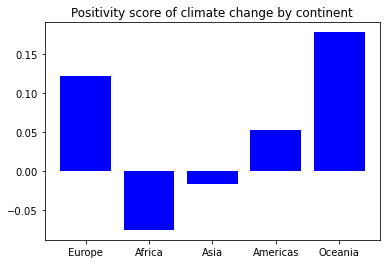

The continent that speaks of climate change most positively is Oceania


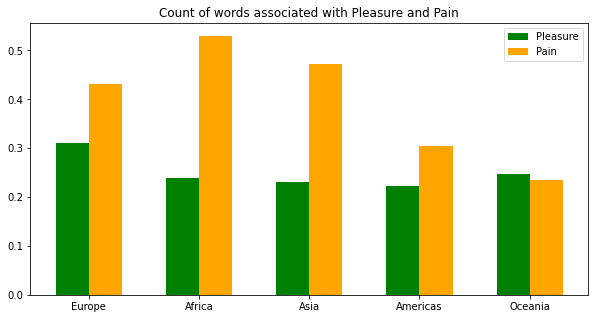

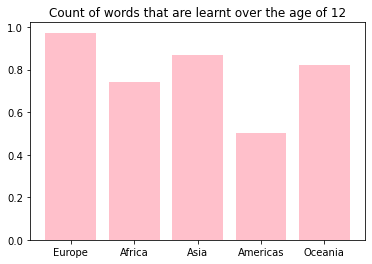

,Europe,Africa,Asia,America,Oceania
0,protecting,built,aggravated,protecting,protecting
1,getting,expected,getting,getting,getting
2,finding,worsened,finding,supporting,supporting
3,supporting,sent,published,challenged,legislate
4,cleaning,need,got,happens,calibrate
5,got,happens,xi,got,published
6,published,beginning,postponed,moderates,audited
7,surrounding,low,spend,published,transformed
8,brought,severe,blamed,clarify,got
9,cajamarca,feeling,drags,brought,prove


,Europe,Africa,Asia,America,Oceania
0,solorgues,governor,inches,inches,establishment
1,door,skeleton,evaluations,governor,educator
2,operations,cleaning,governor,mph,councils
3,capacity,nnanga,happens,tribe,creek
4,portfolio,unique,hurt,push,ecology
5,campaigns,others,ecology,historians,raghav
6,others,capacity,equipment,others,others
7,vote,visits,others,christmases,articles
8,cajamarca,imam,operations,vote,instruments
9,fuels,tons,zones,footprint,footprint


,Europe,Africa,Asia,America,Oceania
0,zone meets europe,zero emissions public,zones vehicles high,zhong said town,ātihaunui ā pāpārangi
1,zone also amid,youssouf said meant,zone early october,zhong pointed mudslides,āhuarangi associate minister
2,zero goals means,young volunteers cameroonians,zhao lijian asked,zhong meteorologist environment,ā pāpārangi ngā
3,zero emissions keeping,young fisherman born,zero emissions 2050,zhong explained added,zero new zealand
4,young peoples organisations,yet severely affected,zero dependencies coal,zhang senior scientist,zero emissions degree
5,yet quantified mounting,yet comparatively overall,yi discuss preparations,young white individuals,zero emissions 2050
6,yet commenced would,years row lowest,yet rarely realise,young community members,zero co2 emissions
7,yellow podded hydroids,years madagascar one,years world big,york city trees,zealand works meet
8,years worth space,years lot fish,years record number,yet crest rainfall,zealand within reach
9,years spent searching,years electric bus,years northern coalfields,yes really really,zealand voices future


In [21]:
Sentiment()

General_Inquirer_List()

Age_of_acquisition()

Count_Verbs()

Count_Nouns()

Collacation()

Summary: 

Sentiment Analysis: Firstly I checked the text for including at leats half of the most common words used in climate change talk by iterating through all the words in the text and checking if there is a match with any words in my list and keeping count of how many I get. If there is sufficent matches we will return a True boolean other wise raise an exception error. I then process the text by spliting up the text into sentences and removing the stop words then using the nltk sentiment to calculate the sentiment score of those sentences. Then we calculate an average of just the compound polarites of those sentences and add them together to then calculate an average. I then use the matplotlib plt functions to plot a graph using the calculated values for each continent. Then I iterate through all the calculated average values and compare each of them to every one of the other values in order to find the largest number and the continent associated with it. In the climate verification function I searched up most common words in climate change talk and used those in the list.

Counting Verbs and Nouns: After I used the POS tags functions from nltk to find all the verbs in a text after tokenizing the text I iterated through the list and put all those verbs in a list of their own so I can then iterate through to count the number of unique words there are in that list and putting it into a dictionary with the word as the key and the cou
nt as the value. I then sorted the dictionary in descending order by its values and took the top 10 from that dictionary to get the most common. I then used the pandas data frame functions to make a data frame out of the data for each continent. The exact same was done with the nouns only difference is that the conditional used checked for 'N' Nouns to append to the list. 

Collocation: I have used the word_tokenize function from nltk to tokenize the words and used a list comprehension to remove stop words. I then used the TrigramCollocationFinder on my tokens and initiated the trigram_measures to measure the frequency of the trigrams found. I then sorted in descending order and took the first 10 to be put into 5 list per continent. I used pandas to create a dataframe out of the results. I choose to do this analysis because it can tell us the most common 3 sets of words that co-occur together, this tells us the most common phrases used in the text. 

General Inquirer List: I have used the GI list from the url to find all the words related to 'Pleasure' and 'Pain' I then iterated through all the words in my continents txt file and kept count of all the matches. I then calculated my percentage using my count for each continent and put the data into a pandas dataframe and used matplotlib to plot the results as a side by side bar graph. We put all this code into a loop that loops through all the continents text from the global variables which will create 4 seperate dictionaries for each continent. I choose the words 'pleasure' and 'pain' from my GI list because pleasure is a positive word and pain is a negative word so it is a reinforcement of my sentiment analysis performed peviously. The GI list is a lexicon which groups words into particular categories and in my case ive chosen pain and pleasure. And it includes words associated with those categories. Pleasure is a positive sentient word and pain is a negative sentiment word so by looking for words in my text associated with those two words. I can see which continent authors are speaker more negative or positive words. 

Age of aquisition: I first make a function that returns a dictionary of the words in the Age of aquisition url where by the word is the key and the age is the value. I then iterate through all of my tokens for each continent checking if the words value is more than 12 and if its also in our continents txt file and if so it keeps count of those words and we calculate a percentage for each continent and use matplotlib to display it. I choose to do this analysis because I want to see what kind of audience the aurthors are targeting, maybe the government or maybe public opinion. By checking for the words above the age of 12 which is the complexity of the vocabulary for people aged above 12. Those continent authors are targeting older audiences who are typically more educated and who can vote and influence government. 


Results and discussion:

What does the results tell us? If one continent has a higher compound sentiment than all the others this means that the author who wrote about climate change in that specific continent is saying more good things about it compared to authors writing about climate change from other continents. This would be an indication that the climate change issue in that specific continent is better off compared to its counterparts. A high compound sentiment could be caused by speech about IMPROVING something, RESCUING someone, FIXING something, HELPING someone, INSPIRE someone etc. This is why we need to run this program with input of the same topic otherwise our results won’t make any sense as there is no association. Climate change is typically viewed as a negative topic, so by looking for the compound sentiment we are able to attain something useful from the results. 

According to my sentiment analysis the Europe and Oceania continent has the highest compound sentiment while Asia and Africa have the lowest compound sentiment. This means that in Oceania and Europe the aurthors are saying better things about climate change compared to those aurthors writing in Asia and Africa which indicates that they could be handling their situation worse than Oceania and Europe. It is known that Norway and New Zealand are the countries that are most likely to survive climate change and Norway is from Europe and New Zealand is from Oceania which reinforces our results. 

After comparing my text to the general inquirer list it has shown that every continent except for oceania has more words associated with Pain than the words associated with Pleasure, this makes sense because climate change is a disaster topic and causes pain so aurthors are more likely to speak more about the negative things about it since it is a negative topic. Oceania results could be due to a lack of variation in the data, but overall it appears to be that they have the lowest amount of words associated with Pain. This model supports my sentiment analysis that was previously performed. Asia and Africa have the most amount of words associated with Pain compared to all the other continents. This indicates that Asia and Africa is experiencing more pain in their continent as a result of climate change. 

When finding the words in each of the text that were classified as being learnt over the age of 12 I found that there was no correlation between the state of the continent during climate change and the level of volcabulary used by the aurthors. However, It is a good indication of what kind of audience the different continents aurthors were targeting. Europe must be targeting more mature audiences whilst america must be targeting younger audiences. This could be because given that America is democratic and has one of the largest world populations it would be advantageous of the aurthors to try influence the public opinion more and specifically those of younger age in order to indirectly influence the voting system since climate change is going to most greatly affect younger citizens. Overall, There appeared to be no clear indication of how the continents are coping with climate change by measuring one aspect of lexical sophistication. 

By looking at the most frequently occuring verbs from each continent I have realized that every continent consist of the verbs 'supporting' and 'increasing' which goes to prove that climate change is still affecting all continents in the world and each continent is doing what they can to try and prevent it. Oceania had mentioned 'grandchildren' so aurthors could be speaking for citizens who have hope since those citizens are talking about the future oceania seems to be in a much more optimistic state.  

Then we look at the most common nouns, Europe mentions 'drought' as being the most common which economically could make sense because europe dominates trade to and from africa and asia and africa actually is most prone to droughts in climate change so Europes goods would be greatly affected. We now have an indication as to why europe might be having the second to highest compound sentiment because they have superior military power to control the trade of less powerful continents such as Asia and Africa which also shows has the lowest compound sentitment. The Aurthors must have been speaking of this relationship. America speaks of 'movement' which reinforces our point before about america targeting a younger audience, the aurthors intentions are more movement orientated rather than a direct action oriented which leads to them having a more neutral in between compound sentiment. Africa mentions 'cop' which is short for 'the Conference of the Parties to the 1992 United Nations' this shows that africa is not a very indenpendant country thats why they need to sign on and rely on the convention for help with climate issues, the aurthors must have clearly mentioned the convention alot. This is also an indication as to why africa has a lower compound sentiment. Asia mentions 'monsoon' which is a seasonal reversal in the wind direction andcauses extreme weather events which the aurthors are saying occurs mostly in Asia yet another reason why they have the second to lowest compound sentiment score. New Zealand aurthors seem to be more concerned with 'homes' and 'pricing' this is because coastal houses are still at very high demand despite climate change this tells us the oceania is not taking climate change very seriously which is why their compound polarity is one of the highest and the pleasure and pain words almost level out. 

We can see from looking at all the co-occuring words that zero emissions comes up the most often for all continents except for america, infact america seems to mention 'young' alot which reinforces the fact that the aurthors target a younger audience. 
The word 'years' was mentioned alot by Europe, Africa and Asia aurthors. This would be telling us that those three continents have been experiencing climate change issues for a long time now, or that they plan to do something about it long term. Using collocatations help us better understand what all these aurthors are trying to tell us so we can get a better grasp of the situation. 

Reflection: 
Since I am doing this at a small scale I am unable to get maximum accuracy, If I were to do this project again at a larger scale I would use a significantly larger dataset for all continents this would greatly increase accuracy. This program could be improved by comparing each country from each continent and putting the results in a dictionary, this way we can see what parts of America are suffering from droughts and which parts are least educated and have less economic power. This would help us find out which aurthors from specific parts of the world and what they are saying about climate change and that could tell us alot about how the situations vary based on the economic relationship between the continents. If we can used for example twitter post then it would be entirely opinion based and there would be a changein results because that way there is a lot of bias and writers from a huge background. It might be more accurate in finding out public opnion from each continent on the topic of climate change which in turn could tell us how the citizens are couping. But newspaper articles are informative and are displayed to the public to influence opinion so its more solid. However the sentiment would identify more of the words in the newspaper text as neutral since its informative compared to opinions which are more skewed to one or the other side. 
The Sentiment analysis and the General Inquirer list was enough to answer our question. However the other test were able to tell us more in depth as to what caused what we saw in the first two test. These lead to economic reasons mostly. 